# 檢視與處理 Outliers
### 為何會有 outliers, 常見的 outlier 原因
* 未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999
* 可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

# [作業目標]
- 依照下列提示與引導, 以幾種不同的方式, 檢視可能的離群值

# [作業重點]
- 從原始資料篩選可能的欄位, 看看那些欄位可能有離群值 (In[3], Out[3])
- 繪製目標值累積密度函數(ECDF)的圖形, 和常態分布的累積密度函數對比, 以確認是否有離群值的情形 (In[6], Out[6], In[7], Out[7])

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

%matplotlib inline

# 設定 data_path
dir_data = '../data'

In [2]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ../data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 請參考 HomeCredit_columns_description.csv 的欄位說明，觀察並列出三個你覺得可能有 outlier 的欄位並解釋可能的原因

In [3]:
pd.read_csv('../data/HomeCredit_columns_description.csv', encoding='latin1')

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


In [4]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [5]:
# histogram, cdf
def plot_cdf(arr):
    # 去除NaN值
    arr = arr.dropna()
    
    # 使用numpy的數據處理函數histogram()，產生pdf分佈數據
    hist, bin_edges = np.histogram(arr)
    width = (bin_edges[1] - bin_edges[0]) * 0.8
    plt.bar(bin_edges[1:], hist/max(hist), width=width, color='#5B9BD5')
    
    # 進一步生成cdf
    cdf  = np.cumsum(hist/sum(hist))
    plt.plot(bin_edges[1:], cdf, '-*', color='#ED7D31')

    # plt.xlim([-2, 2])
    # plt.ylim([0, 1])
    plt.grid()
    plt.show()

Numbers of remain columns: 73

SK_ID_CURR 
數值範圍 min: 100002  ~ max: 456255


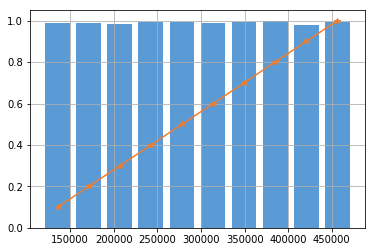

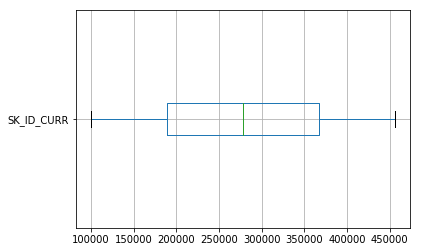

----------------------------------------------------------------------------------------------------
CNT_CHILDREN 
數值範圍 min: 0  ~ max: 19


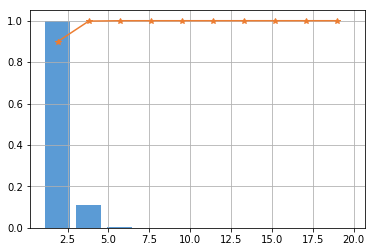

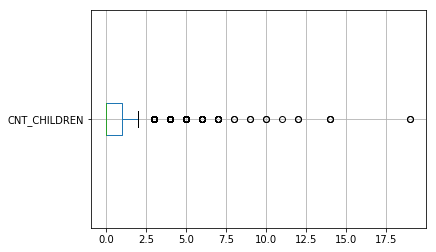

----------------------------------------------------------------------------------------------------
AMT_INCOME_TOTAL 
數值範圍 min: 25650.0  ~ max: 117000000.0


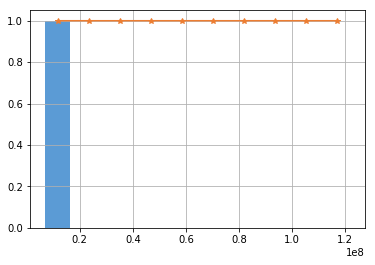

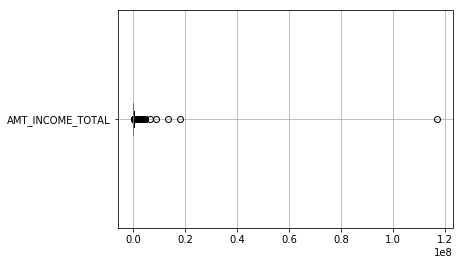

----------------------------------------------------------------------------------------------------
AMT_CREDIT 
數值範圍 min: 45000.0  ~ max: 4050000.0


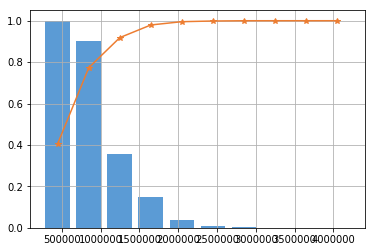

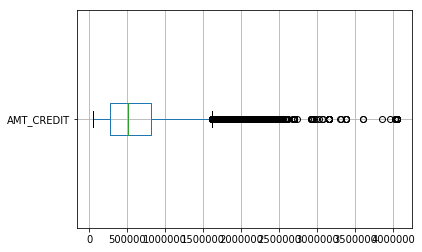

----------------------------------------------------------------------------------------------------
AMT_ANNUITY 
數值範圍 min: 1615.5  ~ max: 258025.5


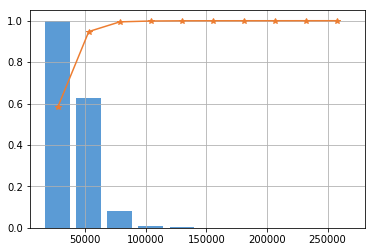

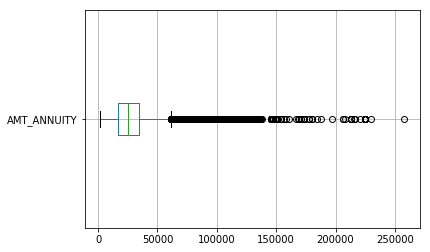

----------------------------------------------------------------------------------------------------
AMT_GOODS_PRICE 
數值範圍 min: 40500.0  ~ max: 4050000.0


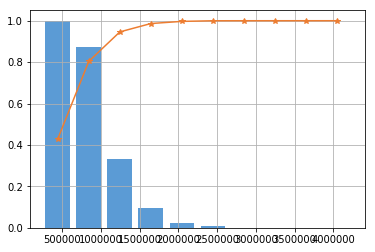

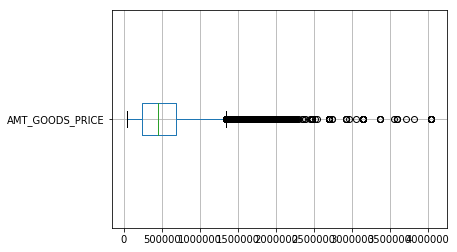

----------------------------------------------------------------------------------------------------
REGION_POPULATION_RELATIVE 
數值範圍 min: 0.00029  ~ max: 0.072508


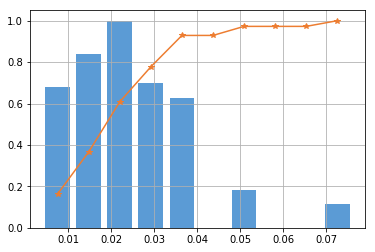

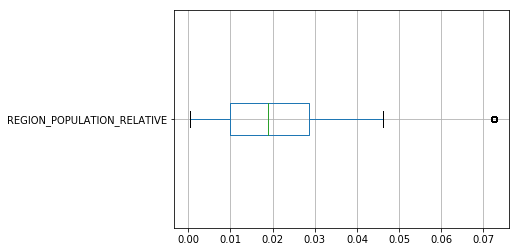

----------------------------------------------------------------------------------------------------
DAYS_BIRTH 
數值範圍 min: -25229  ~ max: -7489


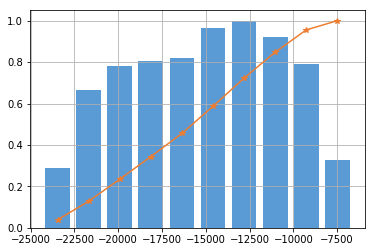

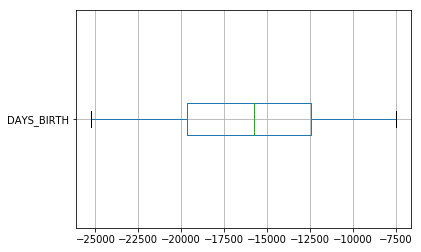

----------------------------------------------------------------------------------------------------
DAYS_EMPLOYED 
數值範圍 min: -17912  ~ max: 365243


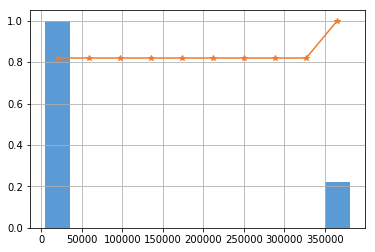

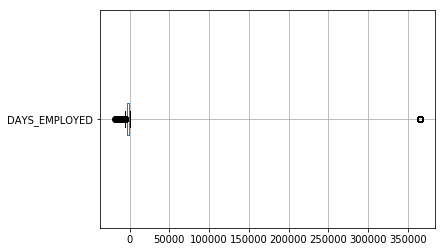

----------------------------------------------------------------------------------------------------
DAYS_REGISTRATION 
數值範圍 min: -24672.0  ~ max: 0.0


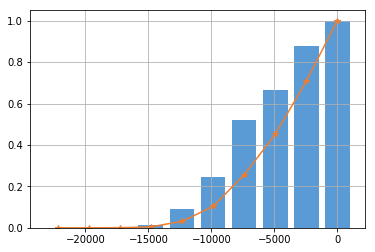

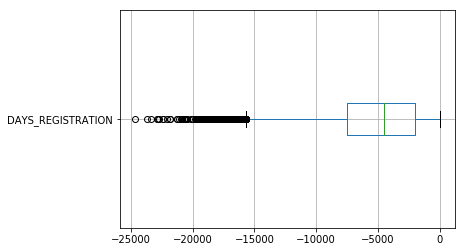

----------------------------------------------------------------------------------------------------
DAYS_ID_PUBLISH 
數值範圍 min: -7197  ~ max: 0


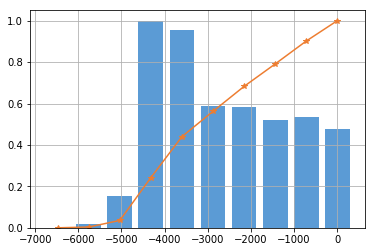

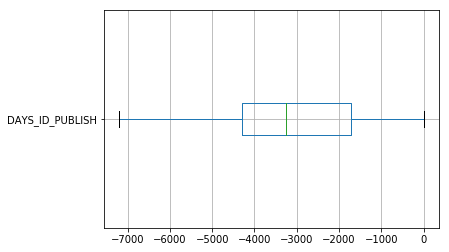

----------------------------------------------------------------------------------------------------
OWN_CAR_AGE 
數值範圍 min: 0.0  ~ max: 91.0


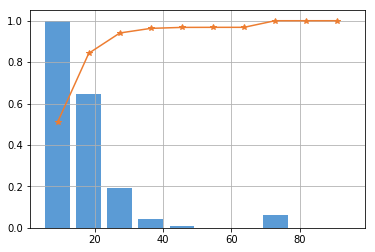

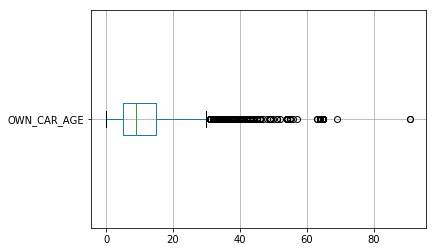

----------------------------------------------------------------------------------------------------
CNT_FAM_MEMBERS 
數值範圍 min: 1.0  ~ max: 20.0


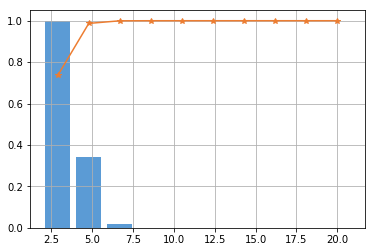

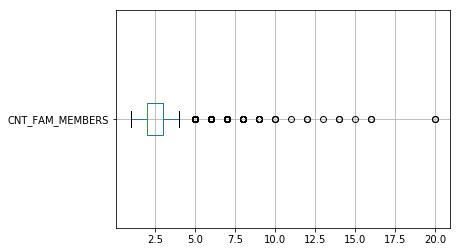

----------------------------------------------------------------------------------------------------
REGION_RATING_CLIENT 
數值範圍 min: 1  ~ max: 3


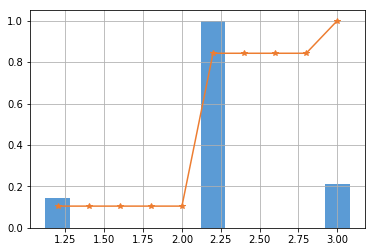

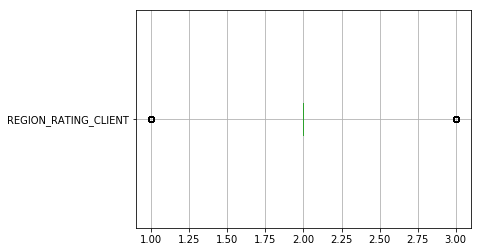

----------------------------------------------------------------------------------------------------
REGION_RATING_CLIENT_W_CITY 
數值範圍 min: 1  ~ max: 3


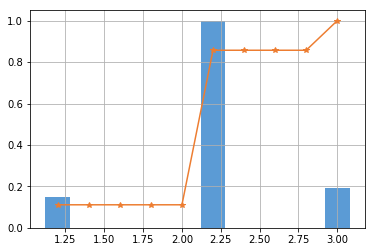

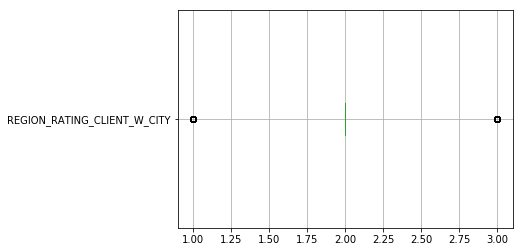

----------------------------------------------------------------------------------------------------
HOUR_APPR_PROCESS_START 
數值範圍 min: 0  ~ max: 23


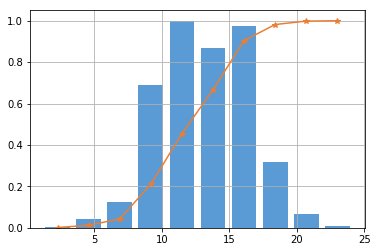

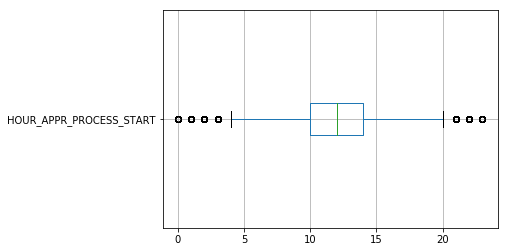

----------------------------------------------------------------------------------------------------
EXT_SOURCE_1 
數值範圍 min: 0.014568132412445587  ~ max: 0.962692770561306


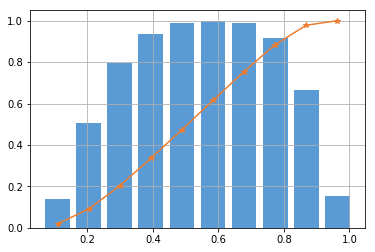

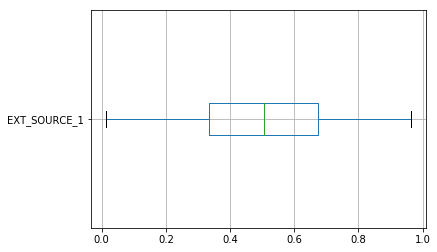

----------------------------------------------------------------------------------------------------
EXT_SOURCE_2 
數值範圍 min: 8.173616518884397e-08  ~ max: 0.8549996664047012


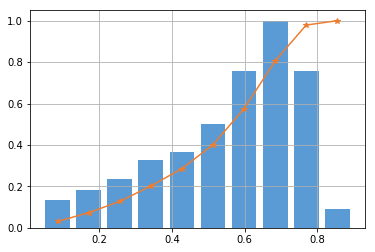

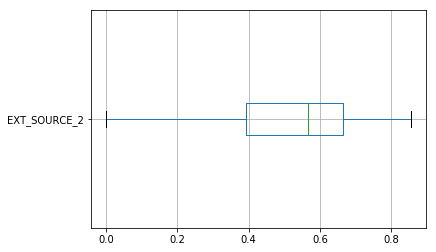

----------------------------------------------------------------------------------------------------
EXT_SOURCE_3 
數值範圍 min: 0.0005272652387098817  ~ max: 0.8960095494948396


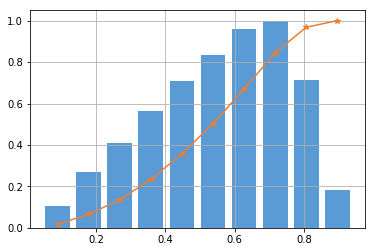

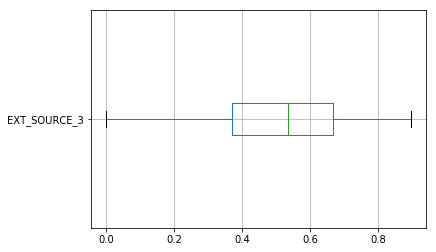

----------------------------------------------------------------------------------------------------
APARTMENTS_AVG 
數值範圍 min: 0.0  ~ max: 1.0


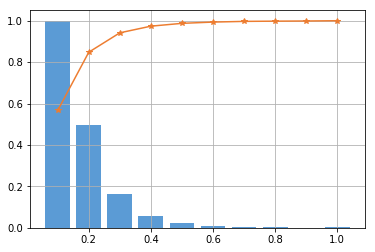

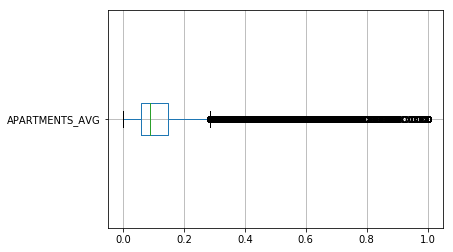

----------------------------------------------------------------------------------------------------
BASEMENTAREA_AVG 
數值範圍 min: 0.0  ~ max: 1.0


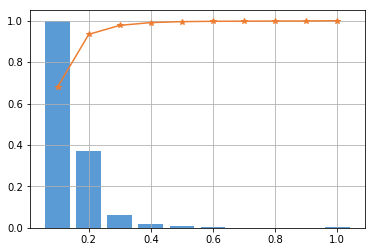

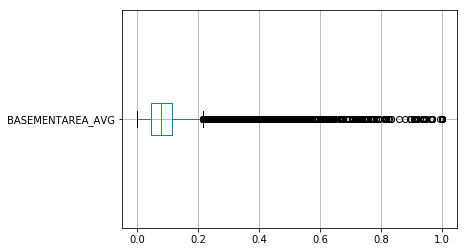

----------------------------------------------------------------------------------------------------
YEARS_BEGINEXPLUATATION_AVG 
數值範圍 min: 0.0  ~ max: 1.0


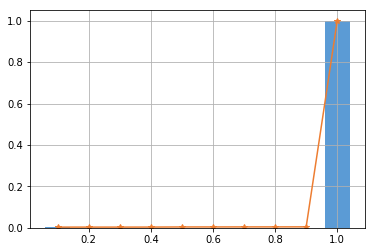

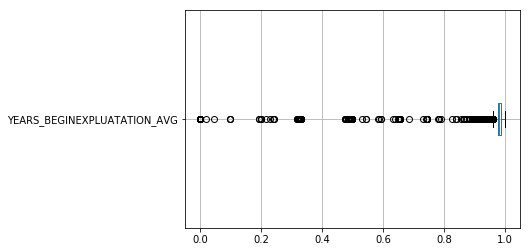

----------------------------------------------------------------------------------------------------
YEARS_BUILD_AVG 
數值範圍 min: 0.0  ~ max: 1.0


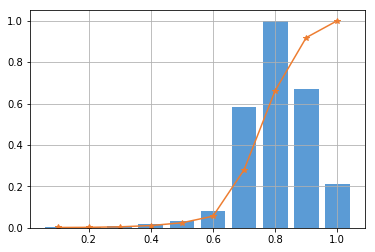

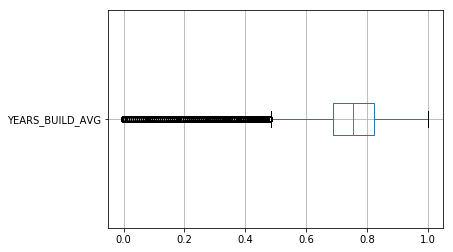

----------------------------------------------------------------------------------------------------
COMMONAREA_AVG 
數值範圍 min: 0.0  ~ max: 1.0


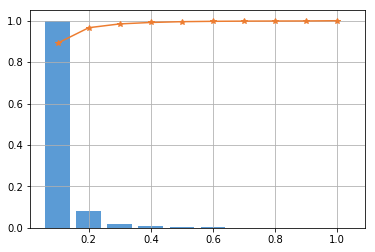

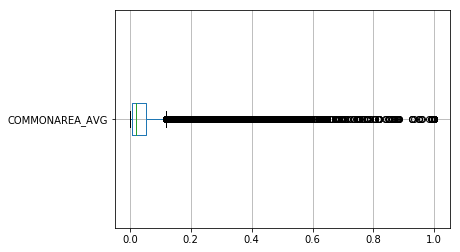

----------------------------------------------------------------------------------------------------
ELEVATORS_AVG 
數值範圍 min: 0.0  ~ max: 1.0


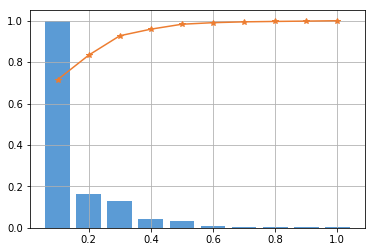

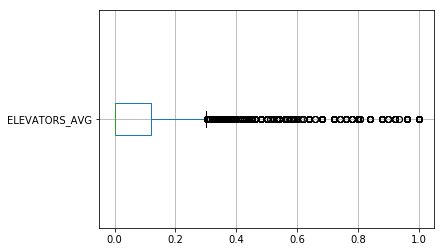

----------------------------------------------------------------------------------------------------
ENTRANCES_AVG 
數值範圍 min: 0.0  ~ max: 1.0


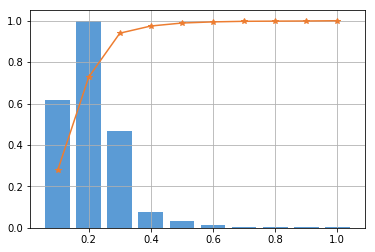

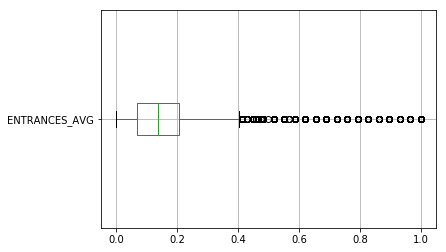

----------------------------------------------------------------------------------------------------
FLOORSMAX_AVG 
數值範圍 min: 0.0  ~ max: 1.0


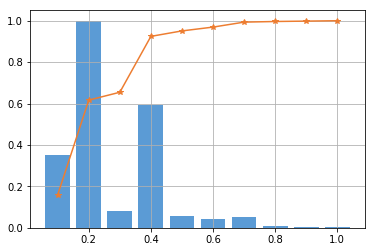

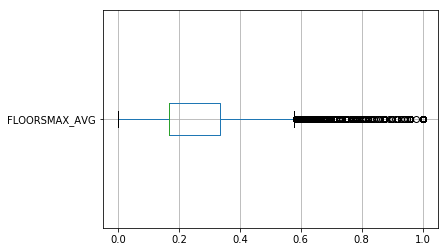

----------------------------------------------------------------------------------------------------
FLOORSMIN_AVG 
數值範圍 min: 0.0  ~ max: 1.0


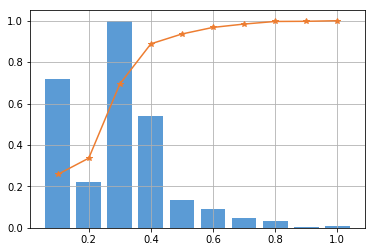

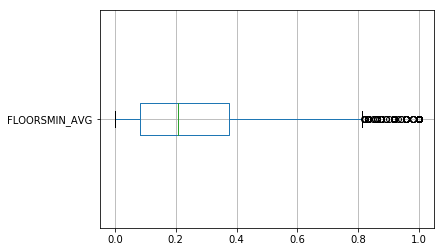

----------------------------------------------------------------------------------------------------
LANDAREA_AVG 
數值範圍 min: 0.0  ~ max: 1.0


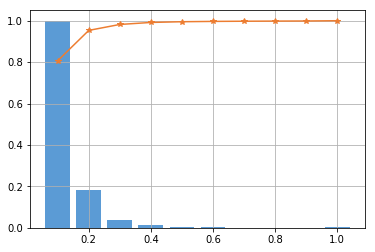

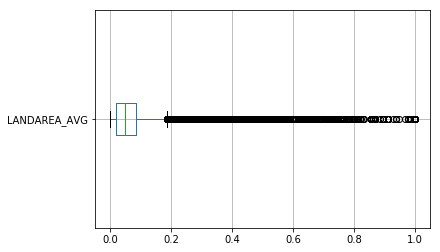

----------------------------------------------------------------------------------------------------
LIVINGAPARTMENTS_AVG 
數值範圍 min: 0.0  ~ max: 1.0


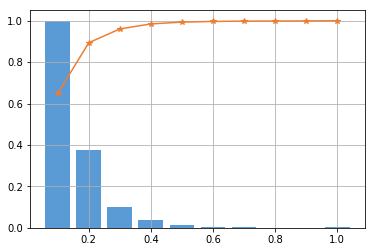

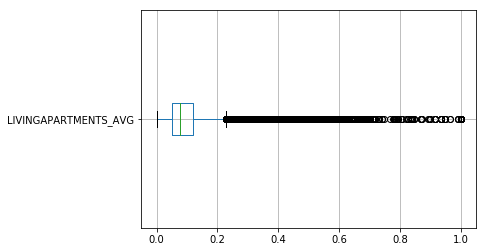

----------------------------------------------------------------------------------------------------
LIVINGAREA_AVG 
數值範圍 min: 0.0  ~ max: 1.0


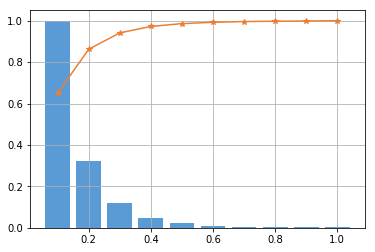

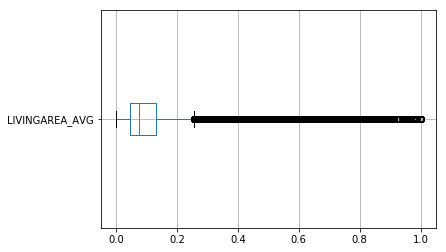

----------------------------------------------------------------------------------------------------
NONLIVINGAPARTMENTS_AVG 
數值範圍 min: 0.0  ~ max: 1.0


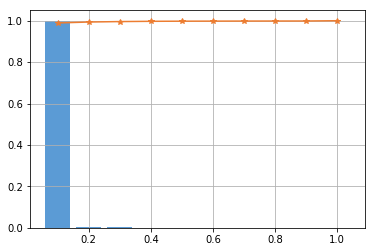

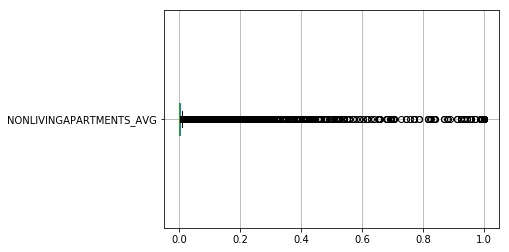

----------------------------------------------------------------------------------------------------
NONLIVINGAREA_AVG 
數值範圍 min: 0.0  ~ max: 1.0


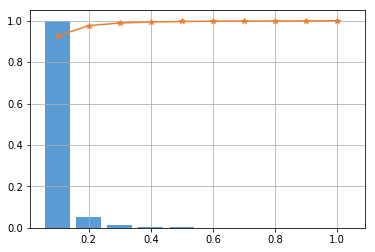

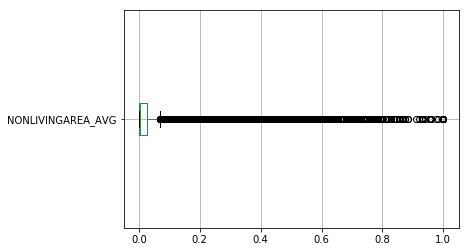

----------------------------------------------------------------------------------------------------
APARTMENTS_MODE 
數值範圍 min: 0.0  ~ max: 1.0


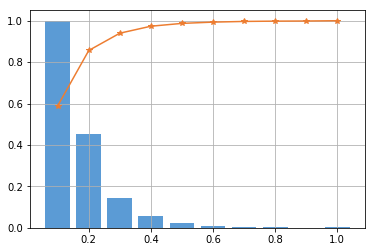

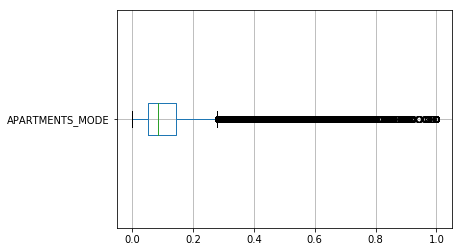

----------------------------------------------------------------------------------------------------
BASEMENTAREA_MODE 
數值範圍 min: 0.0  ~ max: 1.0


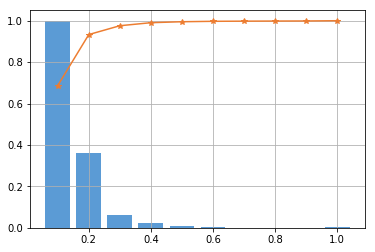

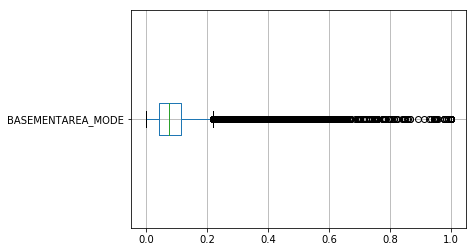

----------------------------------------------------------------------------------------------------
YEARS_BEGINEXPLUATATION_MODE 
數值範圍 min: 0.0  ~ max: 1.0


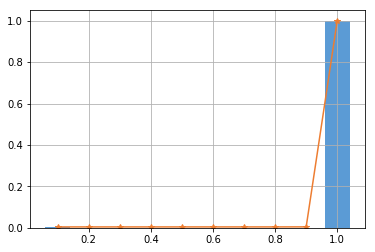

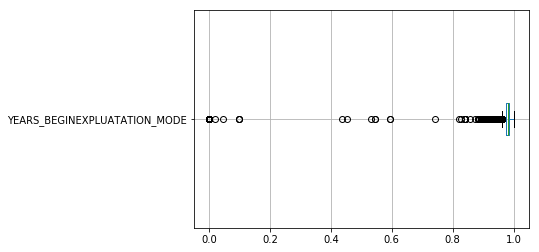

----------------------------------------------------------------------------------------------------
YEARS_BUILD_MODE 
數值範圍 min: 0.0  ~ max: 1.0


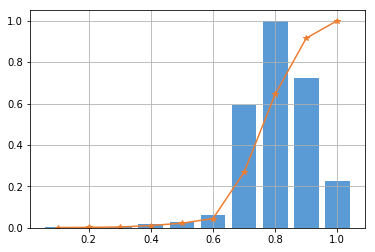

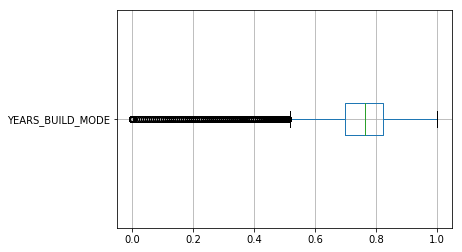

----------------------------------------------------------------------------------------------------
COMMONAREA_MODE 
數值範圍 min: 0.0  ~ max: 1.0


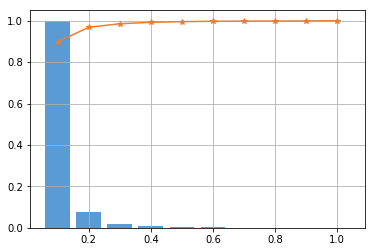

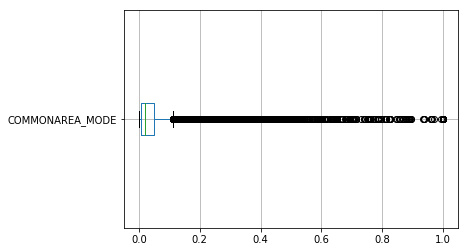

----------------------------------------------------------------------------------------------------
ELEVATORS_MODE 
數值範圍 min: 0.0  ~ max: 1.0


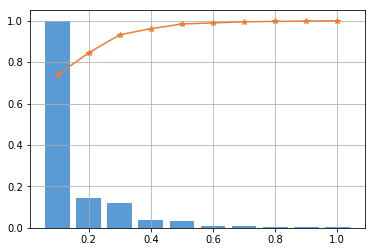

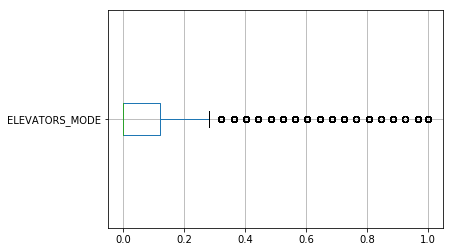

----------------------------------------------------------------------------------------------------
ENTRANCES_MODE 
數值範圍 min: 0.0  ~ max: 1.0


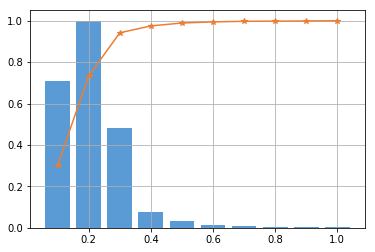

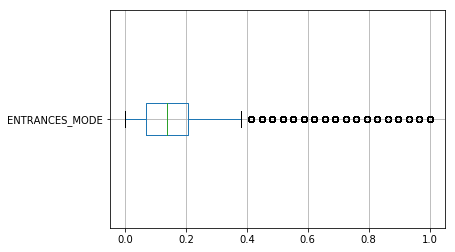

----------------------------------------------------------------------------------------------------
FLOORSMAX_MODE 
數值範圍 min: 0.0  ~ max: 1.0


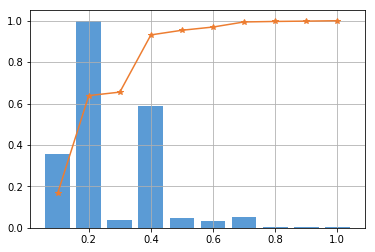

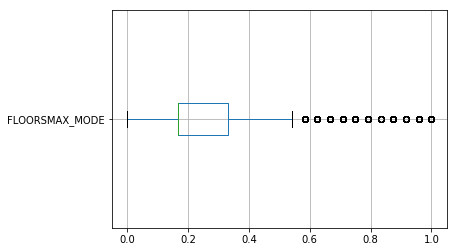

----------------------------------------------------------------------------------------------------
FLOORSMIN_MODE 
數值範圍 min: 0.0  ~ max: 1.0


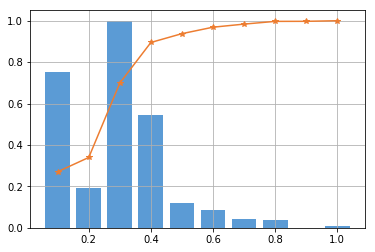

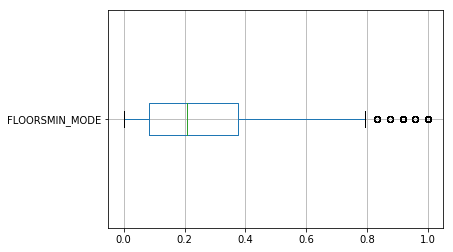

----------------------------------------------------------------------------------------------------
LANDAREA_MODE 
數值範圍 min: 0.0  ~ max: 1.0


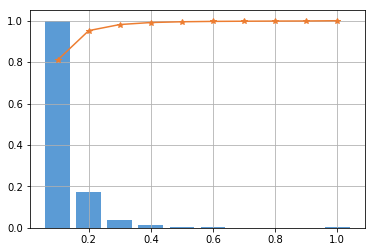

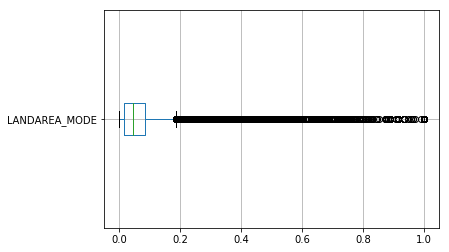

----------------------------------------------------------------------------------------------------
LIVINGAPARTMENTS_MODE 
數值範圍 min: 0.0  ~ max: 1.0


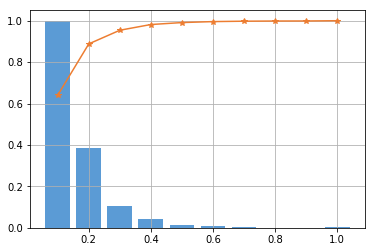

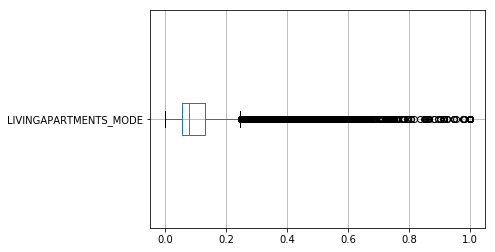

----------------------------------------------------------------------------------------------------
LIVINGAREA_MODE 
數值範圍 min: 0.0  ~ max: 1.0


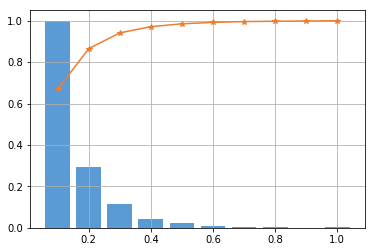

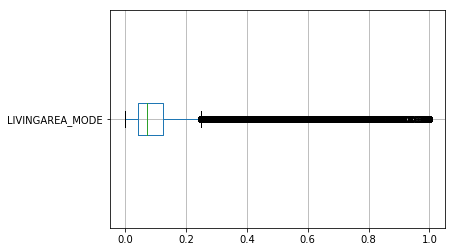

----------------------------------------------------------------------------------------------------
NONLIVINGAPARTMENTS_MODE 
數值範圍 min: 0.0  ~ max: 1.0


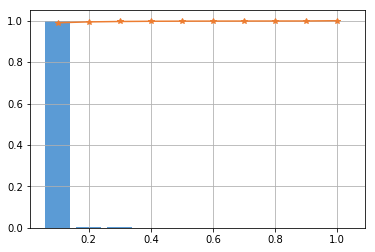

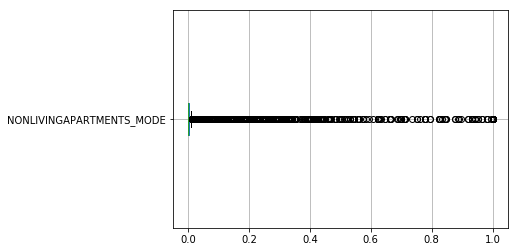

----------------------------------------------------------------------------------------------------
NONLIVINGAREA_MODE 
數值範圍 min: 0.0  ~ max: 1.0


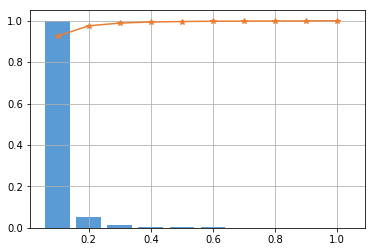

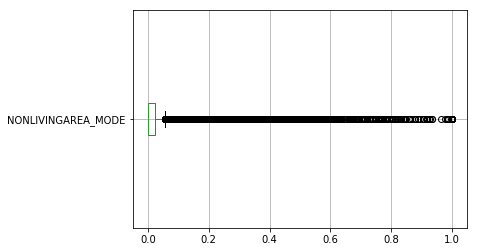

----------------------------------------------------------------------------------------------------
APARTMENTS_MEDI 
數值範圍 min: 0.0  ~ max: 1.0


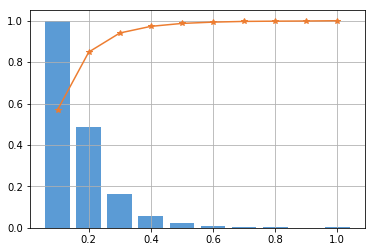

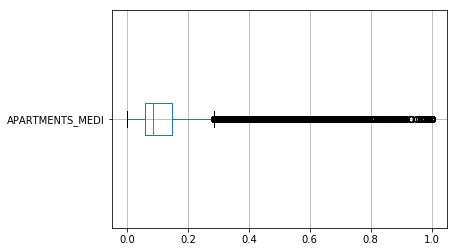

----------------------------------------------------------------------------------------------------
BASEMENTAREA_MEDI 
數值範圍 min: 0.0  ~ max: 1.0


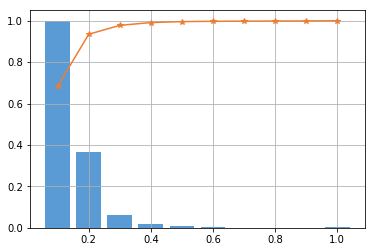

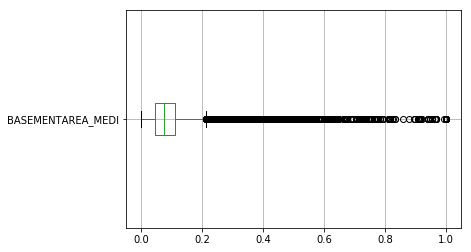

----------------------------------------------------------------------------------------------------
YEARS_BEGINEXPLUATATION_MEDI 
數值範圍 min: 0.0  ~ max: 1.0


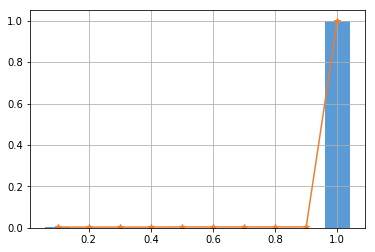

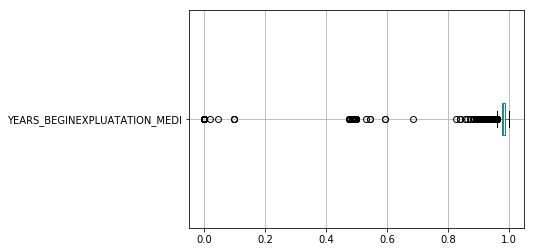

----------------------------------------------------------------------------------------------------
YEARS_BUILD_MEDI 
數值範圍 min: 0.0  ~ max: 1.0


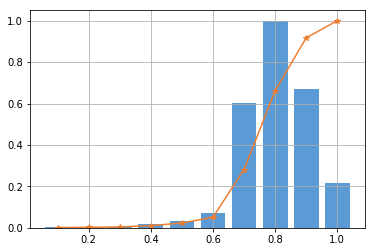

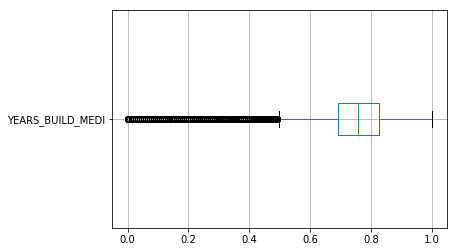

----------------------------------------------------------------------------------------------------
COMMONAREA_MEDI 
數值範圍 min: 0.0  ~ max: 1.0


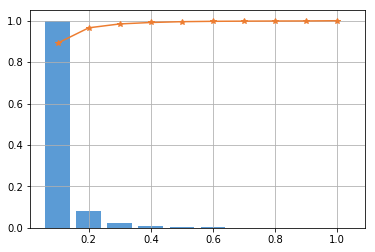

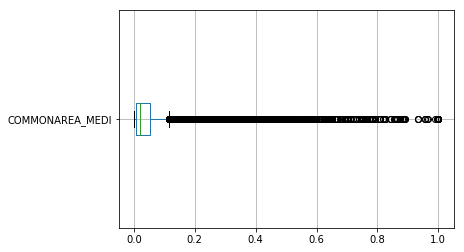

----------------------------------------------------------------------------------------------------
ELEVATORS_MEDI 
數值範圍 min: 0.0  ~ max: 1.0


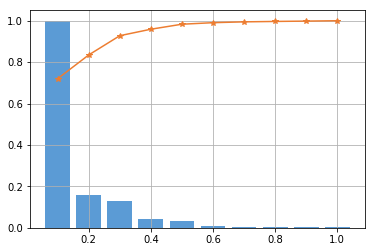

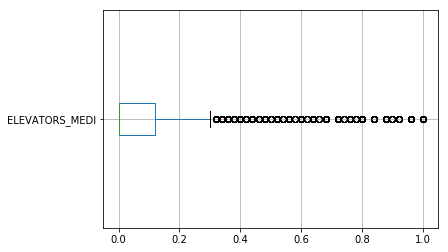

----------------------------------------------------------------------------------------------------
ENTRANCES_MEDI 
數值範圍 min: 0.0  ~ max: 1.0


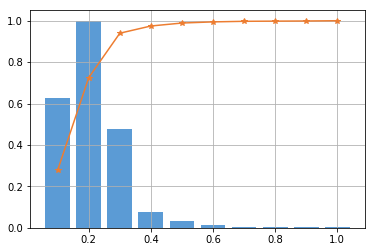

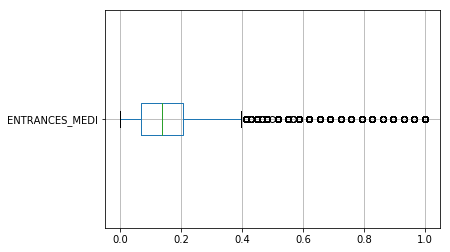

----------------------------------------------------------------------------------------------------
FLOORSMAX_MEDI 
數值範圍 min: 0.0  ~ max: 1.0


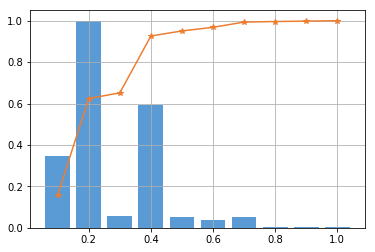

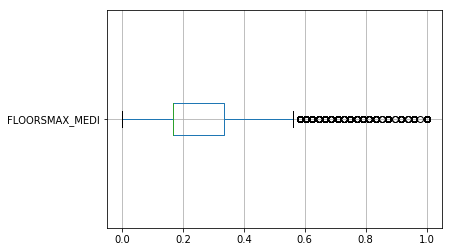

----------------------------------------------------------------------------------------------------
FLOORSMIN_MEDI 
數值範圍 min: 0.0  ~ max: 1.0


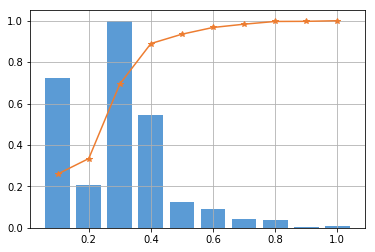

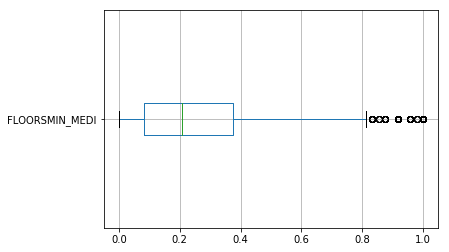

----------------------------------------------------------------------------------------------------
LANDAREA_MEDI 
數值範圍 min: 0.0  ~ max: 1.0


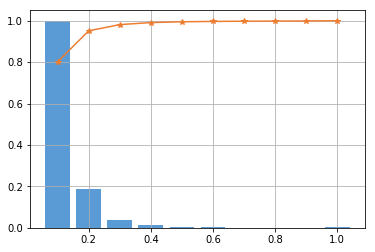

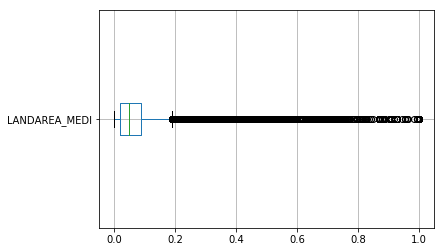

----------------------------------------------------------------------------------------------------
LIVINGAPARTMENTS_MEDI 
數值範圍 min: 0.0  ~ max: 1.0


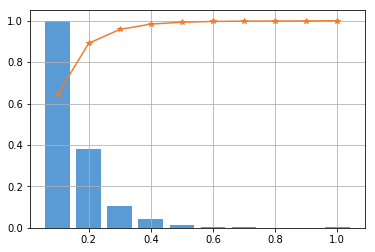

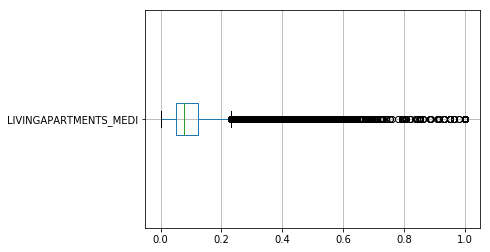

----------------------------------------------------------------------------------------------------
LIVINGAREA_MEDI 
數值範圍 min: 0.0  ~ max: 1.0


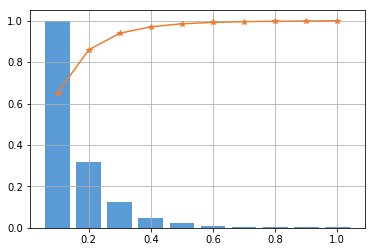

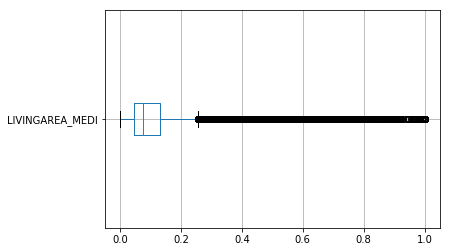

----------------------------------------------------------------------------------------------------
NONLIVINGAPARTMENTS_MEDI 
數值範圍 min: 0.0  ~ max: 1.0


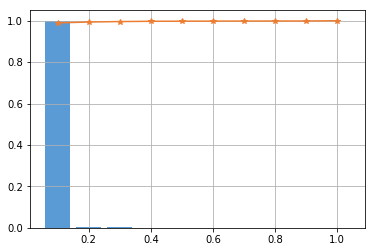

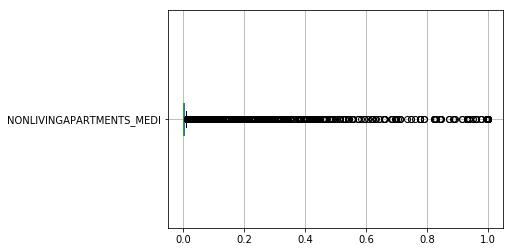

----------------------------------------------------------------------------------------------------
NONLIVINGAREA_MEDI 
數值範圍 min: 0.0  ~ max: 1.0


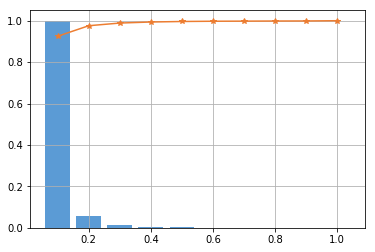

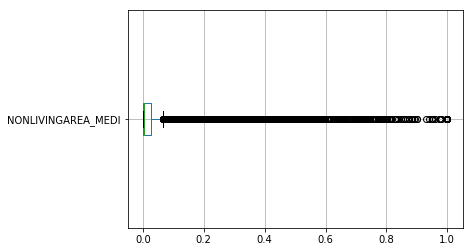

----------------------------------------------------------------------------------------------------
TOTALAREA_MODE 
數值範圍 min: 0.0  ~ max: 1.0


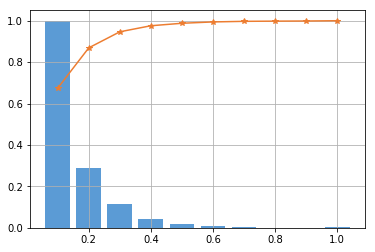

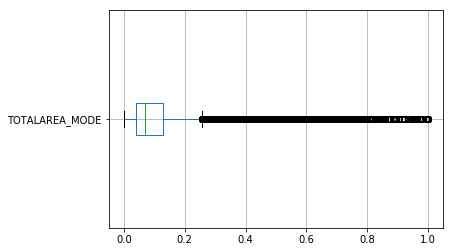

----------------------------------------------------------------------------------------------------
OBS_30_CNT_SOCIAL_CIRCLE 
數值範圍 min: 0.0  ~ max: 348.0


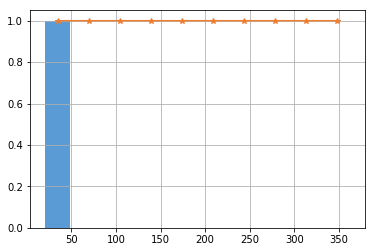

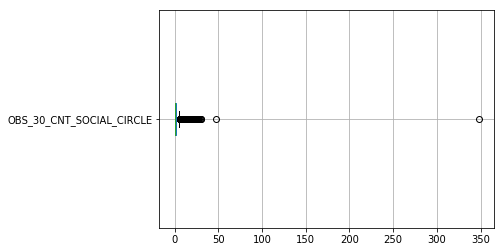

----------------------------------------------------------------------------------------------------
DEF_30_CNT_SOCIAL_CIRCLE 
數值範圍 min: 0.0  ~ max: 34.0


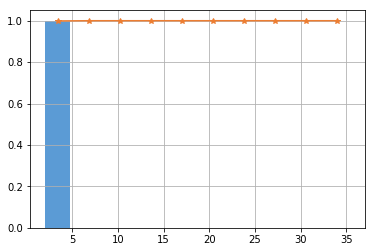

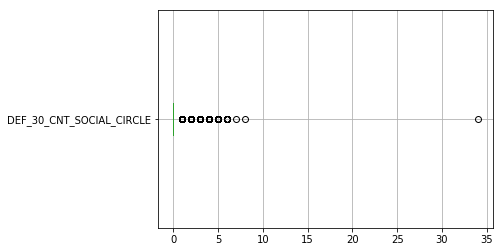

----------------------------------------------------------------------------------------------------
OBS_60_CNT_SOCIAL_CIRCLE 
數值範圍 min: 0.0  ~ max: 344.0


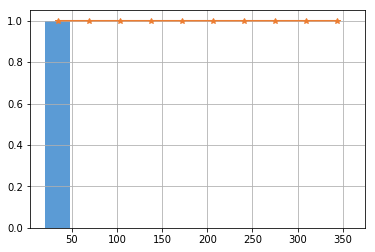

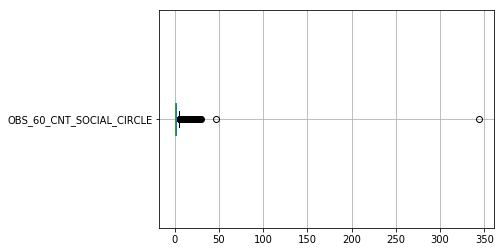

----------------------------------------------------------------------------------------------------
DEF_60_CNT_SOCIAL_CIRCLE 
數值範圍 min: 0.0  ~ max: 24.0


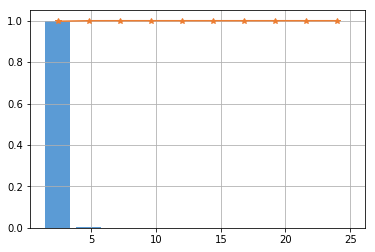

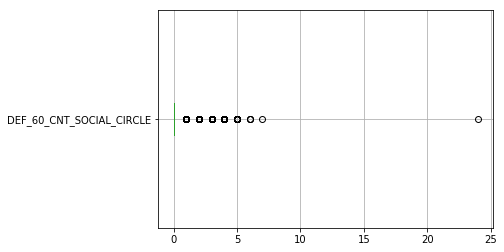

----------------------------------------------------------------------------------------------------
DAYS_LAST_PHONE_CHANGE 
數值範圍 min: -4292.0  ~ max: 0.0


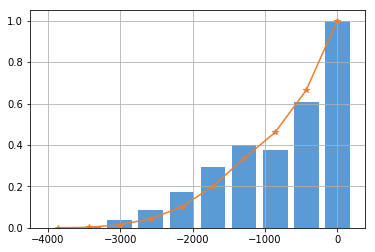

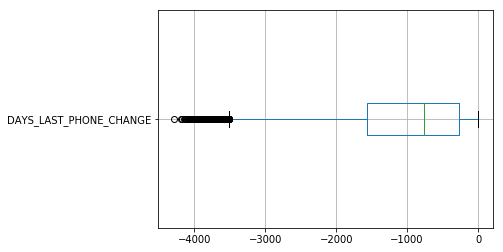

----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_HOUR 
數值範圍 min: 0.0  ~ max: 4.0


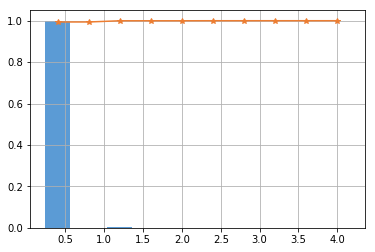

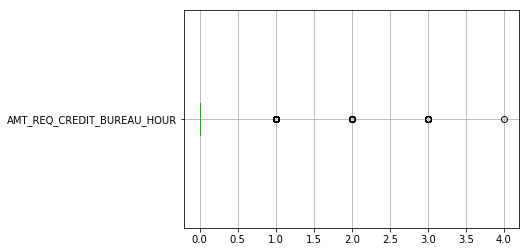

----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_DAY 
數值範圍 min: 0.0  ~ max: 9.0


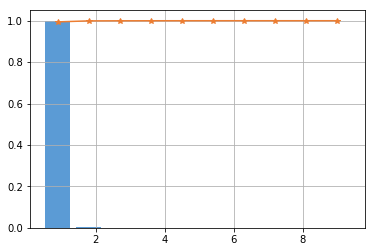

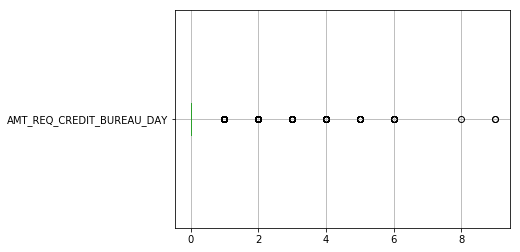

----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_WEEK 
數值範圍 min: 0.0  ~ max: 8.0


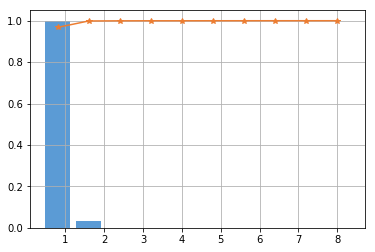

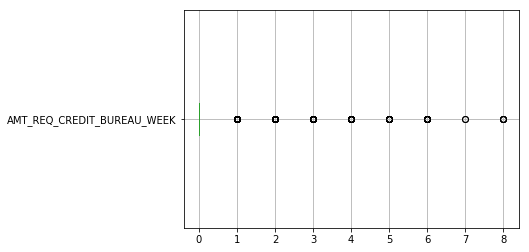

----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_MON 
數值範圍 min: 0.0  ~ max: 27.0


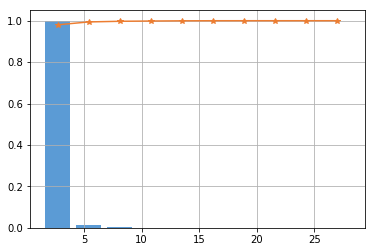

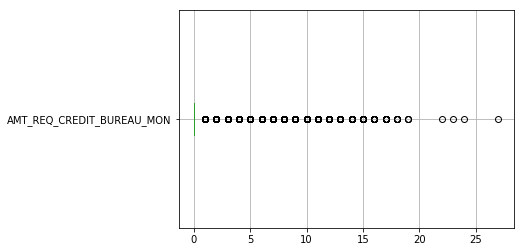

----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_QRT 
數值範圍 min: 0.0  ~ max: 261.0


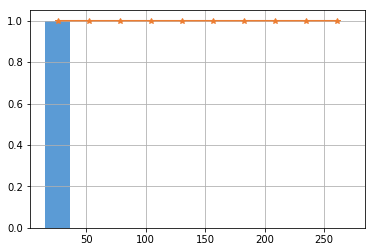

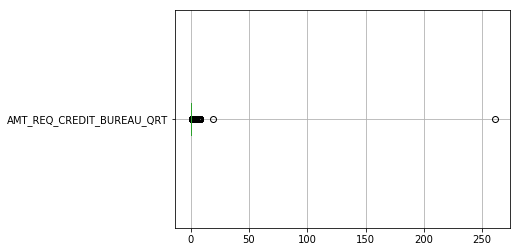

----------------------------------------------------------------------------------------------------
AMT_REQ_CREDIT_BUREAU_YEAR 
數值範圍 min: 0.0  ~ max: 25.0


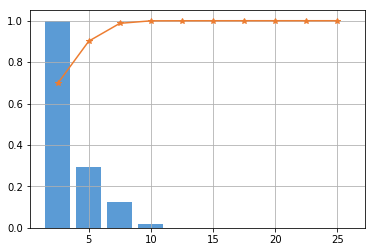

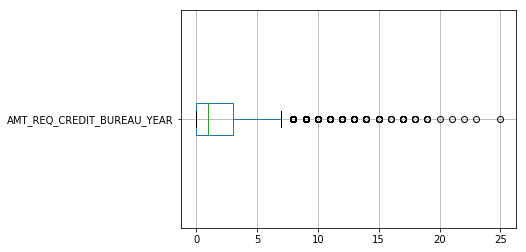

----------------------------------------------------------------------------------------------------


In [6]:
# 先篩選數值型的欄位
dtype_select = [np.dtype('float64'), np.dtype('int64')]
numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])

# 再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
print("Numbers of remain columns: {}\n".format(len(numeric_columns)))

# 檢視這些欄位的數值範圍
for col in numeric_columns:
    print(col, '\n數值範圍 min:', app_train[col].min(), ' ~ max:', app_train[col].max())
    #print(app_train[col].describe())
    
    #app_train[col].hist()
    #plt.show()
    plot_cdf(app_train[col])
    app_train[[col]].boxplot(vert=False)
    plt.show()
    print('-'*100)

In [7]:
# 使用3個標準差來判斷outlier
outlier_col = []
for col in numeric_columns:
    x = np.abs(stats.zscore(app_train[col][:]))
    for i in range(0, len(x)):
        if x[i] > 3:
            if col not in outlier_col:
                outlier_col.append(col)
print(outlier_col)

['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'HOUR_APPR_PROCESS_START']


In [8]:
# 從上面的圖檢查的結果，至少這三個欄位好像有點可疑

# AMT_INCOME_TOTAL
# REGION_POPULATION_RELATIVE
# OBS_60_CNT_SOCIAL_CIRCLE

mean: 168797.9192969845
std: 237123.14627885626
amt_in: 307057


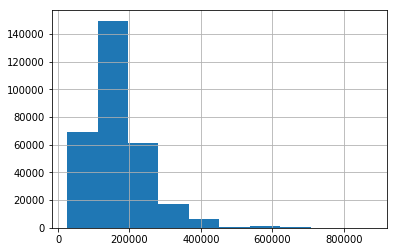

amt_out: 307057


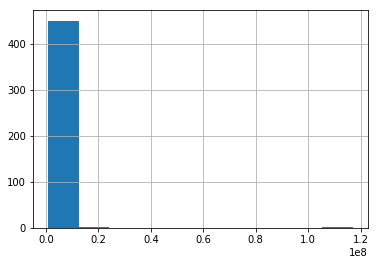

306285     936000.0
306179     949500.0
306028    1350000.0
305577    1215000.0
304477    2025000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [9]:
amt_income_total = app_train['AMT_INCOME_TOTAL']
print('mean:', amt_income_total.mean())
print('std:', amt_income_total.std())
amt_out = amt_income_total[np.abs(amt_income_total - amt_income_total.mean()) >= (amt_income_total.std()*3)]
amt_in = amt_income_total[np.abs(amt_income_total - amt_income_total.mean()) < (amt_income_total.std()*3)]
print('amt_in:', amt_in.count())
amt_in.hist()
plt.show()

print('amt_out:', amt_in.count())
amt_out.hist()
plt.show()
amt_out.sort_index(ascending = False).head()

### Hints: Emprical Cumulative Density Plot, [ECDF](https://zh.wikipedia.org/wiki/%E7%BB%8F%E9%AA%8C%E5%88%86%E5%B8%83%E5%87%BD%E6%95%B0), [ECDF with Python](https://stackoverflow.com/questions/14006520/ecdf-in-python-without-step-function)

In [10]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    return (x, y)

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


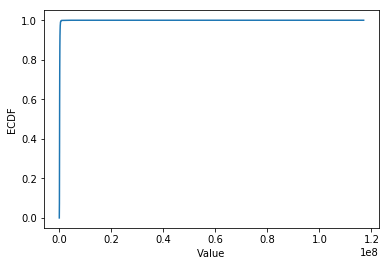

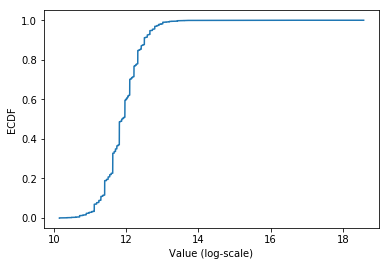

In [11]:
# 最大值離平均與中位數很遠
print(app_train['AMT_INCOME_TOTAL'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
x, y = ecdf(app_train['AMT_INCOME_TOTAL'])


plt.plot(x, y)
plt.xlabel('Value')
plt.ylabel('ECDF')
# plt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.plot(np.log(x), y)
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')

plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

## 補充：Normal dist 的 ECDF
![ecdf_normal](https://au.mathworks.com/help/examples/stats/win64/PlotEmpiricalCdfAndCompareWithSamplingDistributionExample_01.png)

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


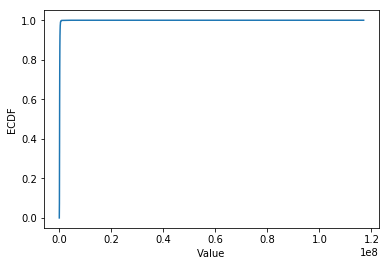

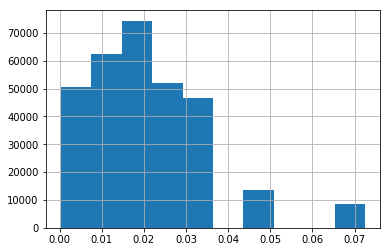

0.072508     8412
0.046220    13442
0.035792    16408
0.032561     6636
0.031329    11321
0.030755    12163
0.028663    11157
0.026392    11601
0.025164    11950
0.024610     6404
0.022800     3807
0.022625     6943
0.020713     8066
0.020246     7178
0.019689     6172
0.019101     8694
0.018850     7668
0.018801     6108
0.018634     7038
0.018209     6052
0.018029     6167
0.016612     4408
0.015221     6824
0.014520     4785
0.014464     3422
0.011703     3252
0.011657     3080
0.010966     3110
0.010643     3012
0.010556     2177
            ...  
0.007114     1684
0.007020     4105
0.006852     2435
0.006671     1653
0.006629     2818
0.006305     1672
0.006296     1225
0.006233     1087
0.006207     1936
0.006008     1796
0.005313     1218
0.005144      967
0.005084     1482
0.005002     1068
0.004960     3300
0.004849     1038
0.003818     1212
0.003813     1616
0.003541      627
0.003122     1147
0.003069     1783
0.002506      944
0.002134     1051
0.002042     1642
0.001417  

In [12]:
# 最大值落在分布之外
print(app_train['REGION_POPULATION_RELATIVE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
cdf = ecdf(app_train['REGION_POPULATION_RELATIVE'])


plt.plot(x, y)
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['REGION_POPULATION_RELATIVE'].hist()
plt.show()

app_train['REGION_POPULATION_RELATIVE'].value_counts().sort_index(ascending=False)

# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，
# 導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


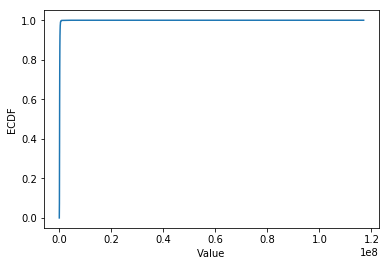

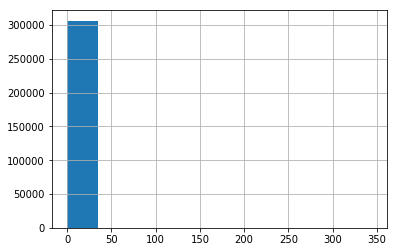

344.0         1
47.0          1
30.0          1
29.0          2
28.0          1
27.0          5
26.0          1
25.0         11
24.0         12
23.0         13
22.0         20
21.0         28
20.0         30
19.0         44
18.0         49
17.0         73
16.0        137
15.0        166
14.0        238
13.0        401
12.0        620
11.0        837
10.0       1335
9.0        1959
8.0        2886
7.0        4344
6.0        6349
5.0        9463
4.0       13946
3.0       20215
2.0       29766
1.0       48870
0.0      164666
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64


In [13]:
# 最大值落在分布之外
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
cdf = ecdf(app_train['OBS_60_CNT_SOCIAL_CIRCLE'])


plt.plot(x, y)
plt.xlabel('Value')
plt.ylabel('ECDF')
# plt.xlim([cdf.index.min() * 0.95, cdf.index.max() * 1.05])
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = False))

## 注意：當 histogram 畫出上面這種圖 (只出現一條，但是 x 軸延伸很長導致右邊有一大片空白時，代表右邊有值但是數量稀少。這時可以考慮用 value_counts 去找到這些數值

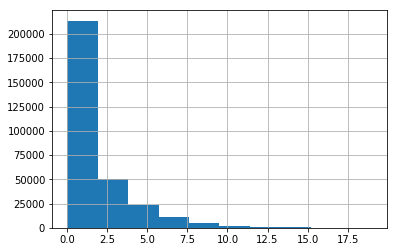

In [14]:
# 把一些極端值暫時去掉，在繪製一次 Histogram
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製
loc_a = app_train['OBS_60_CNT_SOCIAL_CIRCLE'] < 20
loc_b = 'OBS_60_CNT_SOCIAL_CIRCLE'

app_train.loc[loc_a, loc_b].hist()
plt.show()